In [2]:
from DQL import *
#env = gym.make('LunarLander-v2')

Using TensorFlow backend.


In [3]:
env = gym.make('LunarLander-v2')
dS = env.observation_space.shape[0]
nA = env.action_space.n

seed = 123
env.seed(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED']=str(seed)

params = {
    'batch_size' : 32,
    'gamma': 0.99,
    'tau': 0.001,
    'epsilon': 1,
    'epsilon_decay': 0.995,
    'lr': 0.0005,
}

agent = DQL_agent(dS, nA, 
                  batch_size = params['batch_size'], 
                  gamma = params['gamma'], 
                  tau = params['tau'],
                  epsilon = params['epsilon'], 
                  epsilon_decay = params['epsilon_decay'],
                  lr = params['lr'],
                  dumpfile = "weights/final_model3"
                )

In [3]:
#episode 9, reward -215.94583012578377
agent.Q_learning(env)

episode 0, reward -139.61224244352002
episode 100, reward -138.00936319760734
episode 200, reward -43.432164446845526
episode 300, reward 30.52093719131659564
episode 400, reward 126.72393412793197
episode 500, reward 229.82225669019772
episode 600, reward 250.78475455882043
episode 700, reward 232.65016199536905
episode 800, reward 200.48679113571052
episode 900, reward 242.28014530066696
episode 999, reward 236.20797052417063

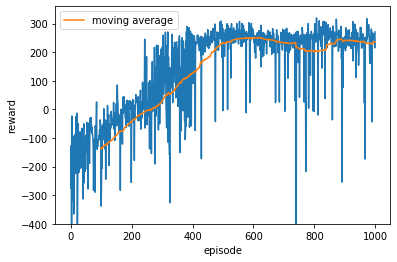

In [7]:
y = moving_average(agent.episode_rewards, n=100)

plt.plot(agent.episode_rewards)
plt.plot(range(99, len(agent.episode_rewards)), y, label="moving average")
plt.xlabel("episode")
plt.ylabel("reward")
plt.ylim(-400,360)
plt.legend()
plt.show()

mean reward in 100 run: 227.6897104510434
std reward in 100 run: 55.25607733983831


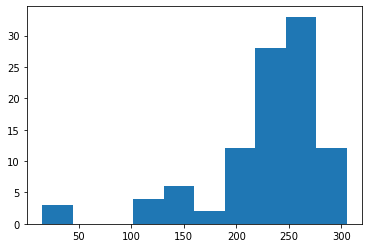

In [8]:
mean, std, r = test_agent(agent, env)
print("mean reward in 100 run:", mean)
print("std reward in 100 run:", std)
plt.hist(r)
plt.show()

In [21]:
results={}
results['params'] = params
results['episode_rewards'] = agent.episode_rewards
results['moving_avg'] = list(y)
json.dump(results, open('experiments/final_model3.txt','w'))
agent.save_model("weights/final_model3.h5")

In [4]:
agent.load_model("weights/final_model3.h5")